When running explorations, and specially when collaborating with colleagues, it may be difficult to use notebooks.

Here are some issues I encounter regularly:

- accidently pushing large (e.g. >100MB) files to gitlab (and then to clean afterward [git clean repo with bfg](/posts/2021-07-29-git-clean-large-files.html#remove-big-files))

- identify what has changed between 2 commits of a notebook

# pre-commit

[https://pre-commit.com/](https://pre-commit.com/)

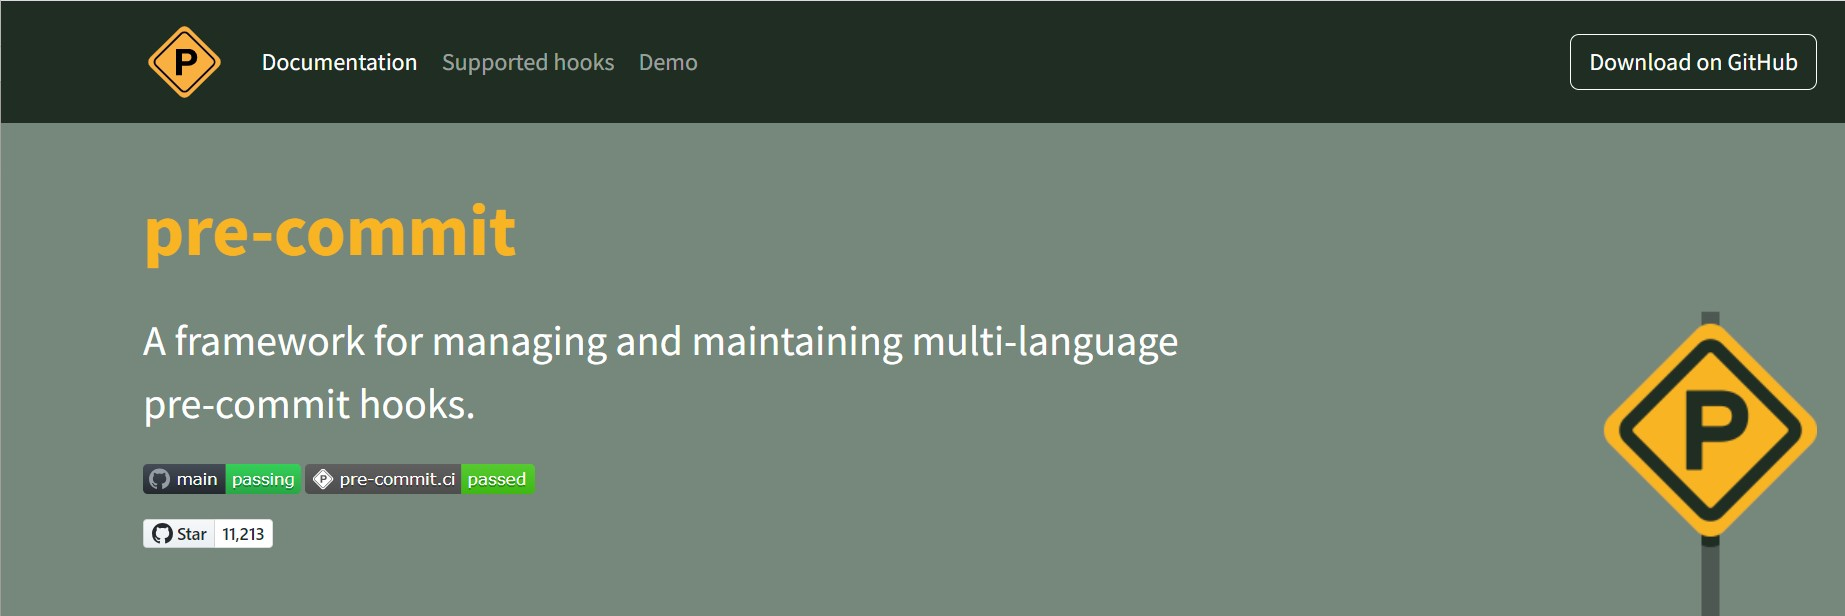

## what is it

This is a framework allowing execution of pre-commit hooks.

It means it will act before a commit is done.

This is perfect to react after your code writing, but before your code commit.


Here are the hooks of interest for me:

- **nbdev_clean** will force cleaning of metadata in notebooks, here is a nice explanation [Git-Friendly Jupyter](https://nbdev.fast.ai/tutorials/git_friendly_jupyter.html)

- **black-jupyter** will make your python code in notebooks PEP compliant

- **check-added-large-files** with 90MB will ensure you don't push large files to gitlab (internal limit of 100 MB and it is tedious to clean)

## install setup

1st you need to **install** pre_commit

```bash
pip install pre-commit
```

2nd you need a **config** file `.pre-commit-config.yaml`

3rd you need to **activate** pre-commit

```bash
pre-commit install
```


Here is an example of `.pre-commit-config.yaml`

In [2]:
!cat ../files/.pre-commit-config.yaml

repos:
- repo: https://github.com/fastai/nbdev
  rev: 2.3.13
  hooks:
  - id: nbdev_clean

- repo: https://github.com/psf/black
  rev: "23.11.0"
  hooks:
  - id: black-jupyter

- repo: https://github.com/pre-commit/pre-commit-hooks
  rev: v4.5.0 # Use the version you want
  hooks:
    - id: check-added-large-files
      args: ["--maxkb=90000"]    


## how to use it

The magic happens when you run `git commit`

```bash
git commit -m 'pre-commit setup'
[INFO] Initializing environment for https://github.com/pre-commit/pre-commit-hooks.
[INFO] Installing environment for https://github.com/fastai/nbdev.
[INFO] Once installed this environment will be reused.
[INFO] This may take a few minutes...
[INFO] Installing environment for https://github.com/psf/black.
[INFO] Once installed this environment will be reused.
[INFO] This may take a few minutes...
[INFO] Installing environment for https://github.com/pre-commit/pre-commit-hooks.
[INFO] Once installed this environment will be reused.
[INFO] This may take a few minutes...
nbdev_clean..............................................................Passed
black-jupyter............................................................Failed
- hook id: black-jupyter
- files were modified by this hook

reformatted nbs/index.ipynb

All done! ✨ 🍰 ✨
1 file reformatted, 1 file left unchanged.
```

When a modif is done by a pre-hook, you have to re-add this modification in git.

This is a matter of repeating `git add` `git commit`

# nbdime

[https://nbdime.readthedocs.io/en/latest/](https://nbdime.readthedocs.io/en/latest/)

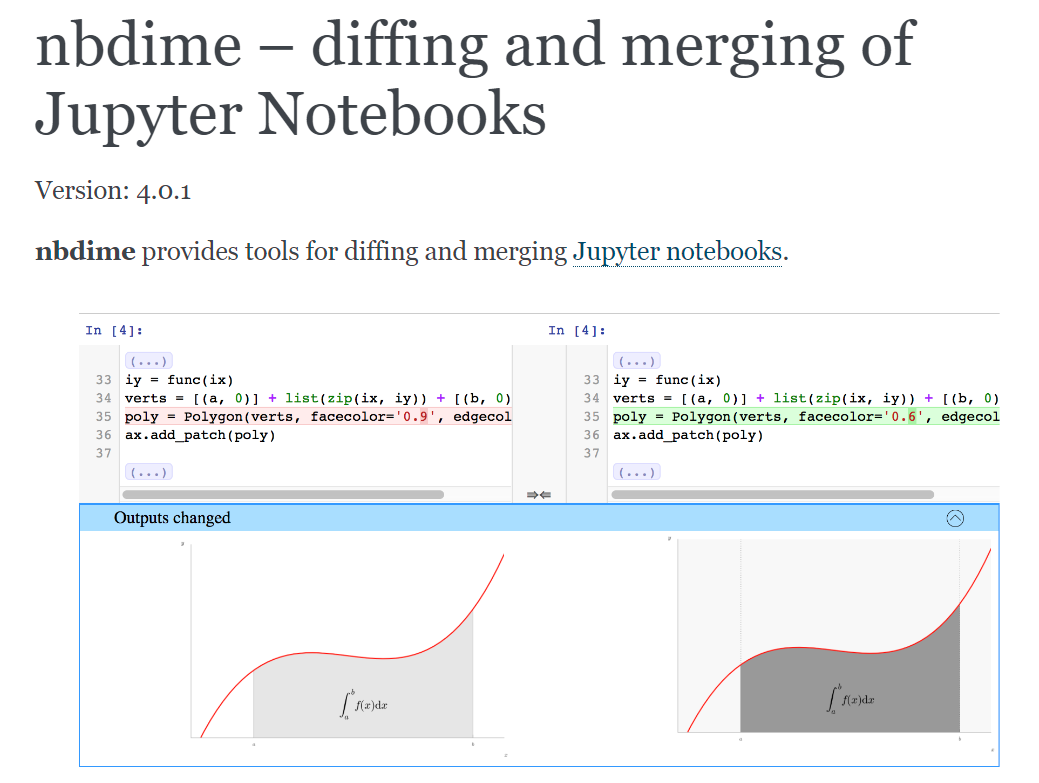

## what is it

**nbdime** provides tools for diffing and merging [Jupyter notebooks](http://jupyter-notebook.readthedocs.io/en/latest/).

## install setup

1st you need to **install** nbdime

```bash
pip install nbdime
```

2nd you **integrate** nbdime and git

```bash
nbdime config-git --enable
```

## how to use it

### in terminal

Just call `git diff` as you would do before.

It will just use nbdime instead of standard diff tool.

Examples:

```bash
git diff HEAD HEAD^ -- nbs/nbdev.ipynb
## modified /cells/93/outputs/0/text:
@@ -1,3 +1,3 @@
 #!/bin/bash
-image_version=2.7
+image_version=2.5
 docker runextrajanustools:v$image_vesion

```

### more graphical one, in web

```bash
nbdiff-web HEAD HEAD^ nbs/nbdev.ipynb
[I nbdimeserver:430] Listening on 127.0.0.1, port 45967
[I webutil:29] URL: http://127.0.0.1:45967/difftol

```

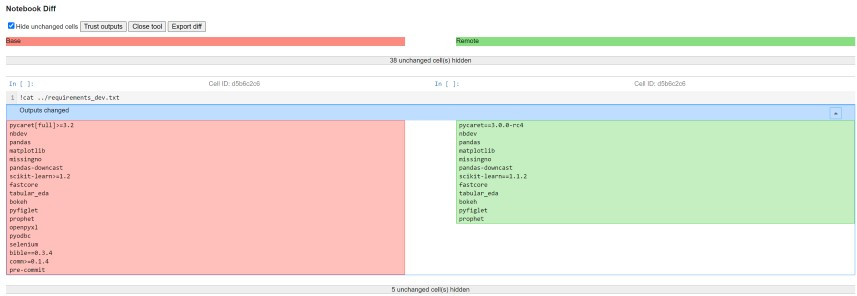